In [ ]:
# Import thư viện cần thiết
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import re, unicodedata
from collections import Counter

In [ ]:
file_path = "/content/Dh Foods - TTS Research - Testing.xlsx"
df = pd.read_excel(file_path, sheet_name="DỮ LIỆU")

In [ ]:
df

,STT,Tên sản phẩm,Giá bán,Doanh số 365 ngày gần nhất,Sản phẩm đã bán trong khoảng 365 ngày gần nhất,Tổng doanh số,Tổng lượt bán,Tổng đánh giá,Brand
0,1,[Tặng hộp hoặc sốt] Combo 3 gói sốt muối kim c...,91100,2383563000,24148,4999687040,50686,11674,O'food
1,2,"Sa Tế Sò Điệp Thích Cay Sốt Trộn Mì, Hủ Tiếu, ...",59000,812970720,14151,4396505105,78015,17262,THÍCH CAY
2,3,Nước Mắm Tĩn Nhãn Đỏ Độ Đạm 40N Cặp 2 Chai Thủ...,330000,679857000,2073,1181512000,3601,746,Nước Mắm Tĩn
3,4,"Mắm nêm pha sẵn cao cấp Làng Chài Xưa, nguyên ...",63000,638419100,9847,744189300,11477,1903,Làng Chài Xưa
4,5,Sốt Gà Rán Ottogi Chai 2.4KG,145000,548102000,3820,960943300,6715,674,Ottogi
...,...,...,...,...,...,...,...,...,...
195,196,"Combo 4 Loại Natural Gia Vị Nấu Phở, Bún Dh Fo...",16000,50700500,1407,53543800,1488,87,Dh Foods
196,197,[01 Chai Cá vàng - 60N - 500ml] Nước Mắm Tĩn C...,218000,50.354.000₫15%,229,95440000,434,87,Nước Mắm Tĩn
197,198,01 BÌNH GỐM 60 ĐẠM Nước mắm Tĩn cá cơm ruột đỏ...,248000,49976000,200,110947000,444,83,Nước Mắm Tĩn
198,199,Bột tương đen Ottogi 1kg VN,185000,49920500,262,64970000,341,64,Ottogi


**TỔNG QUAN DỮ LIỆU**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   STT                                             200 non-null    int64 
 1   Tên sản phẩm                                    200 non-null    object
 2   Giá bán                                         200 non-null    int64 
 3   Doanh số 365 ngày gần nhất                      200 non-null    object
 4   Sản phẩm đã bán trong khoảng 365 ngày gần nhất  200 non-null    int64 
 5   Tổng doanh số                                   200 non-null    int64 
 6   Tổng lượt bán                                   200 non-null    int64 
 7   Tổng đánh giá                                   200 non-null    int64 
 8   Brand                                           200 non-null    object
dtypes: int64(6), object(3)
memory usage: 14.2+ KB


In [ ]:
# Kích thước dữ liệu
print("Shape:", df.shape)

# Thông tin các cột
df.info()

Shape: (200, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   STT                                             200 non-null    int64 
 1   Tên sản phẩm                                    200 non-null    object
 2   Giá bán                                         200 non-null    int64 
 3   Doanh số 365 ngày gần nhất                      200 non-null    object
 4   Sản phẩm đã bán trong khoảng 365 ngày gần nhất  200 non-null    int64 
 5   Tổng doanh số                                   200 non-null    int64 
 6   Tổng lượt bán                                   200 non-null    int64 
 7   Tổng đánh giá                                   200 non-null    int64 
 8   Brand                                           200 non-null    object
dtypes: int64(6), object(3)
memory usage: 14

In [ ]:
# Kiểm tra dữ liệu thiếu
df.isnull().sum()

,0
STT,0
Tên sản phẩm,0
Giá bán,0
Doanh số 365 ngày gần nhất,0
Sản phẩm đã bán trong khoảng 365 ngày gần nhất,0
Tổng doanh số,0
Tổng lượt bán,0
Tổng đánh giá,0
Brand,0


In [ ]:
# Kiểm tra dữ liệu trùng
total_duplicates = df.duplicated().sum()

df.drop_duplicates(inplace=True)

print(f"Đã xóa {total_duplicates} dòng duplicate.")

Đã xóa 0 dòng duplicate.


In [ ]:
# Loại bỏ khoảng trắng thừa trong dữ liệu text
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

/tmp/ipython-input-2206851469.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [ ]:
# Với các cột text: thay giá trị "-" bằng Unknown
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].replace("-", "Unknown")

In [ ]:
# Chuẩn hóa cột doanh số
df['Doanh số 365 ngày gần nhất'] = (
    df['Doanh số 365 ngày gần nhất']
    .astype(str)
    .str.extract(r'([\d\.]+)')[0]
    .str.replace('.', '', regex=False)
    .astype(int)
)

In [ ]:
# Chuẩn hóa cột brand
def norm_key(s: str) -> str:
    if pd.isna(s): return ""
    s = str(s).strip()
    s = unicodedata.normalize("NFD", s)
    s = "".join(ch for ch in s if unicodedata.category(ch) != "Mn")
    s = re.sub(r"\W+", "", s)
    return s.lower()

clusters = {}
for v in df['Brand'].astype(str):
    k = norm_key(v)
    clusters.setdefault(k, Counter())
    clusters[k][v.strip()] += 1

canonical_by_key = {k: cnt.most_common(1)[0][0] for k, cnt in clusters.items()}

key_series = df['Brand'].astype(str).map(norm_key)
df['Brand'] = key_series.map(canonical_by_key).fillna(df['Brand'])


report = (
    df['Brand'].value_counts()
      .rename_axis("Brand_canonical")
      .reset_index(name="count")
)

print("Đã chuẩn hoá Brand. Số brand sau khi gộp:", report.shape[0])
display(report.head(20))

Đã chuẩn hoá Brand. Số brand sau khi gộp: 18


,Brand_canonical,count
0,Làng Chài Xưa,26
1,THÍCH CAY,25
2,O'food,21
3,Ottogi,21
4,Dh Foods,21
5,Nước Mắm Tĩn,17
6,Cholimex,16
7,Barona,14
8,Lee Kum Kee,9
9,THUẬN PHÁT,7


In [ ]:
df.describe()

,STT,Giá bán,Doanh số 365 ngày gần nhất,Sản phẩm đã bán trong khoảng 365 ngày gần nhất,Tổng doanh số,Tổng lượt bán,Tổng đánh giá
count,200.000000,2.000000e+02,2.000000e+02,200.000000,2.000000e+02,200.000000,200.000000
mean,100.500000,1.309648e+05,1.564442e+08,3476.730000,2.932918e+08,5901.230000,898.385000
std,57.879185,1.640083e+05,1.998476e+08,5404.589862,4.932219e+08,9357.119253,1693.121258
min,1.000000,4.900000e+03,4.991700e+07,90.000000,4.991700e+07,147.000000,23.000000
25%,50.750000,3.406425e+04,6.945112e+07,628.750000,1.167974e+08,1047.000000,191.500000
50%,100.500000,7.048300e+04,1.025628e+08,1567.000000,1.806028e+08,2844.000000,435.000000
75%,150.250000,1.720755e+05,1.679431e+08,3639.500000,2.914928e+08,6755.500000,935.500000
max,200.000000,1.258000e+06,2.383563e+09,39083.000000,4.999687e+09,78015.000000,17262.000000


In [ ]:
df.describe(include='object')

,Tên sản phẩm,Brand
count,200,200
unique,200,18
top,[Tặng hộp hoặc sốt] Combo 3 gói sốt muối kim c...,Làng Chài Xưa
freq,1,26


In [ ]:
df.sample(10)

,STT,Tên sản phẩm,Giá bán,Doanh số 365 ngày gần nhất,Sản phẩm đã bán trong khoảng 365 ngày gần nhất,Tổng doanh số,Tổng lượt bán,Tổng đánh giá,Brand
176,177,[Mua 3 được 6] Mua 3 chai nước tương shiitake ...,358000,57594000,160,144975100,403,103,Làng Chài Xưa
142,143,[Tặng 1 hộp nhựa cao cấp 2L] Combo 5 sốt muối ...,185000,76347000,404,78615000,416,140,O'food
188,189,Lốc 10 Chai Nước Mắm Tĩn Mini Du Lịch 40N 60ml...,250000,53584000,216,89006000,359,85,Nước Mắm Tĩn
135,136,Cá ngừ ngâm dầu Seaspimex 185g,28000,81477200,2911,100714200,3598,165,Seaspimex Since 1993
66,67,Cặp 2 chai 60 độ đạm Nước Mắm Tĩn Cá Cơm Ruột ...,218000,135695000,617,246537000,1121,243,Nước Mắm Tĩn
42,43,Thùng 6 chai nước mắm nhỉ cá cơm than Làng Chà...,218000,186864600,885,257556600,1222,352,Làng Chài Xưa
44,45,Gia vị nấu phở bò Hà Nội Natural DH Foods nêm ...,16738,183070636,12193,380341874,25397,1124,Dh Foods
182,183,Mì Tương Đen Bắc Kinh Ottogi (5 Gói),64500,54712080,983,177577780,3215,739,Ottogi
134,135,Dầu hào Lee Kum Kee Premium Brand Oyster Sauce...,108800,82066200,723,117157900,1032,193,Lee Kum Kee
56,57,Muối Hồng Himalaya Xay Nhuyễn Vipep Túi 500g d...,31000,155064040,4336,203095240,5682,654,Vipep


In [ ]:
clean_path="/content/Dh_Foods_cleaned.xlsx"
df.to_excel(clean_path,index=False)
print("Đã lưu bản clean:", clean_path)

Đã lưu bản clean: /content/Dh_Foods_cleaned.xlsx


**EDA**

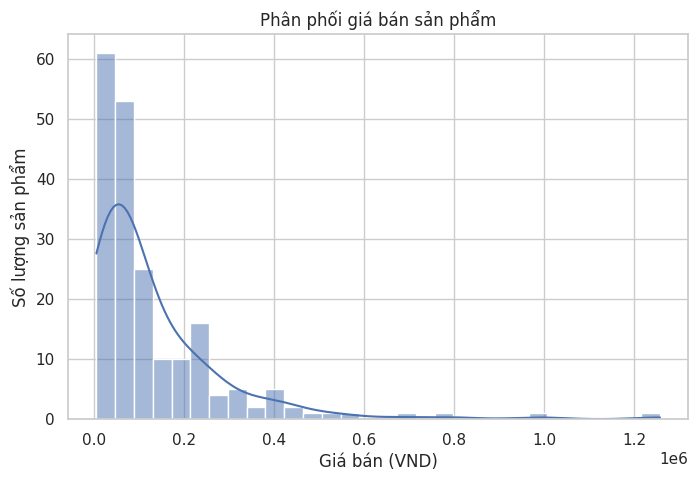

In [ ]:
sns.set(style="whitegrid")

# Phân phối giá bán
plt.figure(figsize=(8,5))
sns.histplot(df["Giá bán"].dropna(), bins=30, kde=True)
plt.title("Phân phối giá bán sản phẩm")
plt.xlabel("Giá bán (VND)")
plt.ylabel("Số lượng sản phẩm")
plt.show()

**Biểu đồ cho ta thấy:**

- Các sản phẩm có giá thấp chiếm đa số, phần lớn các sản phẩm có giá dưới 100.000 VND, cụm cột cao nhất nằm ở khoảng từ 0 - 50.000 VND.

- Các sản phẩm có giá tầm trung và cao ít xuất hiện. Cụ thể là từ khoảng 200.000 VND trở lên, số lượng sản phẩm giảm nhanh.Trên 500.000 VND gần như rất ít sản phẩm, chỉ rải rác vài mẫu.

**Kết luận sơ bộ:**

- Danh mục sản phẩm về gia vị hiện tại nghiêng về phân khúc giá rẻ - trung bình thấp.

- Phân khúc cao cấp chiếm tỉ lệ rất nhỏ, có thể là nhóm hàng đặc sản hoặc combo số lượng lớn.

/tmp/ipython-input-1259385568.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x="Doanh số 365 ngày gần nhất", y="Tên sản phẩm", palette="viridis")


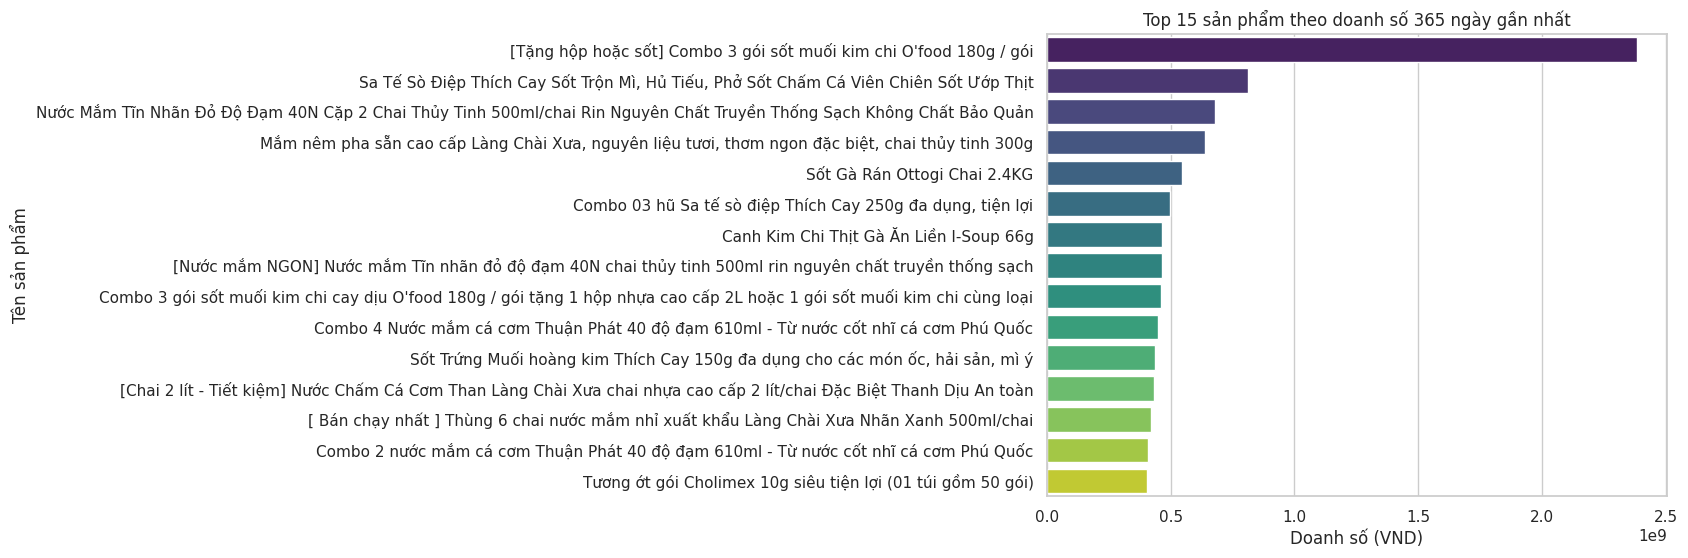

In [ ]:
# Top 15 sản phẩm theo doanh số 365 ngày gần nhất
top_products = (
    df.groupby("Tên sản phẩm", as_index=False)["Doanh số 365 ngày gần nhất"]
      .sum()
      .sort_values("Doanh số 365 ngày gần nhất", ascending=False)
      .head(15)
)
plt.figure(figsize=(8,6))
sns.barplot(data=top_products, x="Doanh số 365 ngày gần nhất", y="Tên sản phẩm", palette="viridis")
plt.title("Top 15 sản phẩm theo doanh số 365 ngày gần nhất")
plt.xlabel("Doanh số (VND)")
plt.ylabel("Tên sản phẩm")
plt.show()

**Biểu đồ cho thấy:**

- Sản phẩm bán chạy nhất là **"[Tặng hộp hoặc sốt] Combo 3 gói sốt muối kim chi O'food 180g / gói"** đứng đầu với doanh số áp đảo (~2,4 tỷ VND), bỏ xa các sản phẩm còn lại. Khoảng cách với sản phẩm đứng thứ 2 là rất lớn, chứng tỏ đây là best-seller.

- Các sản phẩm theo sau: Nhóm hạng 2-4 có doanh số dao động quanh 0,6-0,8 tỷ VND, khá sát nhau. Các sản phẩm đó gồm:

  - Sa Tế Sò Điệp Thích Cay Sốt Trộn Mì, Hủ Tiếu…
  - Nước Mắm Tĩn Nhãn Đỏ Độ Đạm 40N Cặp 2 Chai…
  - Mắm nêm pha sẵn cao cấp Làng Chài Xưa…

**Kết luận sơ bộ:**

- Sản phẩm top 1 chiếm tỷ trọng cực lớn so với phần còn lại → Doanh số bị tập trung vào một vài sản phẩm chủ lực.

- Nhiều sản phẩm top dưới (ví dụ từ hạng 10-15) có doanh số xấp xỉ 0,3-0,4 tỷ VND, cách biệt khá xa top đầu.

/tmp/ipython-input-3037551408.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_brands, x="Tổng doanh số", y="Brand", palette="magma")


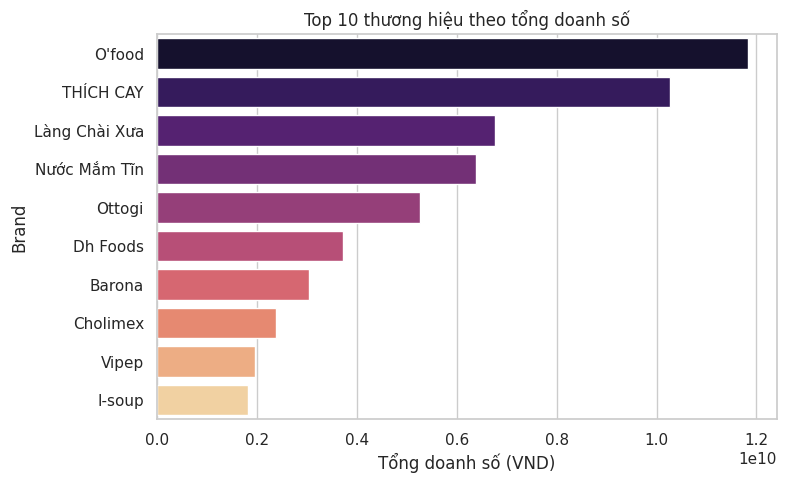

In [ ]:
# Top thương hiệu theo tổng doanh số
top_brands = (
    df.groupby("Brand", as_index=False)["Tổng doanh số"]
      .sum()
      .sort_values("Tổng doanh số", ascending=False)
      .head(10)
)
plt.figure(figsize=(8,5))
sns.barplot(data=top_brands, x="Tổng doanh số", y="Brand", palette="magma")
plt.title("Top 10 thương hiệu theo tổng doanh số")
plt.xlabel("Tổng doanh số (VND)")
plt.ylabel("Brand")
plt.show()


**Biểu đồ cho thấy:**

- Thương hiệu **O'food** dẫn đầu có doanh số vượt trội (~11,8 tỷ VND), bỏ xa các thương hiệu khác. Chứng tỏ đây là thương hiệu chủ lực, đóng góp phần lớn vào tổng doanh thu.

- Nhóm thương hiệu theo sau là **THÍCH CAY, Làng Chài Xưa và Nước Mắm Tĩn** đều đạt trên 6 tỷ VND, tương đối cân bằng với nhau.

- Thương hiệu **Ottogi** đứng thứ 5, doanh số khoảng 5 tỷ VND.

- Nhóm thương hiệu có doanh số trung bình là **Dh Foods, Barona, Cholimex, Vipep và I-soup** có doanh số từ 1,8 đến 3,7 tỷ VND. Khoảng cách giữa nhóm này với top 1 là rất lớn.

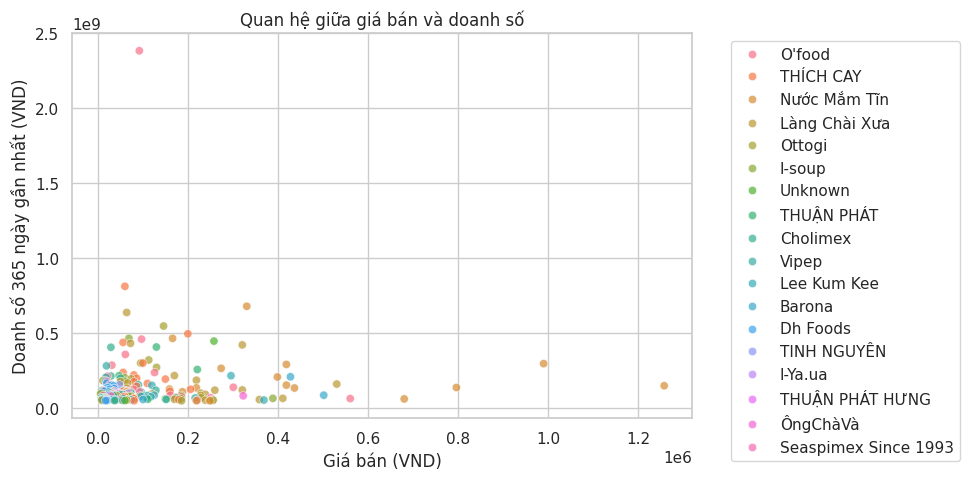

In [ ]:
# Quan hệ giữa giá bán và doanh số 365 ngày gần nhất
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Giá bán", y="Doanh số 365 ngày gần nhất", hue="Brand", alpha=0.7)
plt.title("Quan hệ giữa giá bán và doanh số")
plt.xlabel("Giá bán (VND)")
plt.ylabel("Doanh số 365 ngày gần nhất (VND)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Biểu đồ cho thấy:**

- Phần lớn sản phẩm có giá bán thấp ( thấp hơn 200.000 VND) nhưng vẫn đạt nhiều mức doanh số khác nhau.

- Nhiều điểm tập trung dày ở vùng giá thấp và doanh số từ 0 đến ~0,5 tỷ VND.

- Có một sản phẩm giá chỉ khoảng vài chục nghìn nhưng doanh số đạt gần 2,4 tỷ VND → đây chính là sản phẩm bán chạy nhất toàn bộ dataset (có thể là combo hoặc sản phẩm tiêu dùng nhanh).

- Sản phẩm giá cao (hơn 500.000 VND) xuất hiện ít và hầu hết có doanh số thấp hơn so với nhóm giá thấp, cho thấy sản phẩm cao cấp không phải là nguồn doanh thu chính.

**Ý nghĩa:** Phân khúc giá thấp mang lại phần lớn doanh thu, phù hợp chiến lược sản phẩm tiêu dùng nhanh (FMCG).